<a href="https://colab.research.google.com/github/Kouashik07/Auusie_RainFall_Prediction/blob/main/Aussie_RainFall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.express as px
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='red'

In [2]:
raw_df=pd.read_csv('/content/drive/MyDrive/Sample_Datasets/weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

In [5]:
px.histogram(raw_df,x='Humidity9am',color='RainTomorrow')

In [6]:
px.histogram(raw_df,x='RainToday',color='RainTomorrow')

In [7]:
px.scatter(raw_df.sample(2000),x='MaxTemp',y='MinTemp',color='RainToday')

In [8]:
px.scatter(raw_df.sample(2000),x='Humidity3pm',y='Temp3pm',color='RainTomorrow')

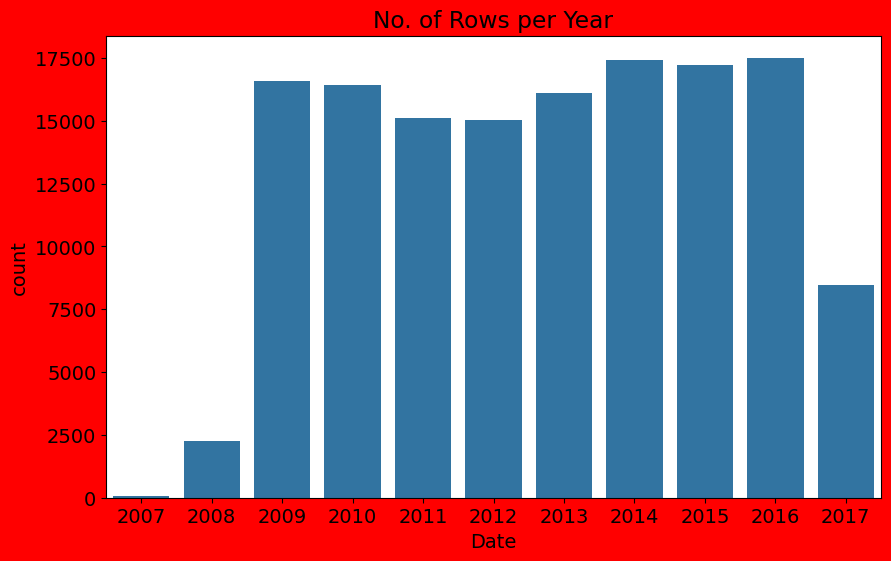

In [9]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [10]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [11]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [12]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()


In [13]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [15]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [17]:
train_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False).fit(train_inputs[categorical_cols])

In [19]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [20]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

/tmp/ipython-input-2318466707.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2318466707.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2318466707.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2318466707.py:1: PerformanceWarning:

In [21]:
train_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,Albury,0.516509,0.517241,0.001617,0.064161,0.531618,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Albury,0.375000,0.559387,0.000000,0.064161,0.531618,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.570881,0.000000,0.064161,0.531618,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Albury,0.417453,0.614943,0.000000,0.064161,0.531618,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Albury,0.613208,0.697318,0.002695,0.064161,0.531618,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
X_train=train_inputs[numeric_cols+encoded_cols].copy()
X_val=val_inputs[numeric_cols+encoded_cols].copy()
X_test=test_inputs[numeric_cols+encoded_cols].copy()

In [23]:
X_val

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2133,0.469340,0.720307,0.0,0.064161,0.531618,0.186047,0.080460,0.126437,0.45,0.14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2134,0.566038,0.837165,0.0,0.064161,0.531618,0.387597,0.103448,0.103448,0.45,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2135,0.603774,0.812261,0.0,0.064161,0.531618,0.325581,0.229885,0.229885,0.35,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2136,0.813679,0.712644,0.0,0.064161,0.531618,0.271318,0.080460,0.080460,0.46,0.37,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2137,0.648585,0.752874,0.0,0.064161,0.531618,0.209302,0.080460,0.103448,0.60,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,0.683962,0.743295,0.0,0.064161,0.531618,0.356589,0.402299,0.229885,0.23,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144914,0.625000,0.775862,0.0,0.064161,0.531618,0.372093,0.344828,0.356322,0.17,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144915,0.613208,0.789272,0.0,0.064161,0.531618,0.387597,0.379310,0.252874,0.12,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144916,0.672170,0.823755,0.0,0.064161,0.531618,0.410853,0.229885,0.195402,0.12,0.12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [25]:
train_pred=model.predict(X_train)
accuracy=accuracy_score(train_targets,train_pred)
print(accuracy)
cf=confusion_matrix(train_targets,train_pred)
# sns.heatmap(cf,annot=True)
cf

0.9999797955307714


array([[76705,     0],
       [    2, 22281]])

In [26]:
train_probs=model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
val_pred=model.predict(X_val)
val_prob=model.predict_proba(X_val)
accuracy=accuracy_score(val_targets,val_pred)
print(accuracy)
print(val_prob)
cf=confusion_matrix(val_targets,val_pred)
# sns.heatmap(cf,annot=True)
cf

0.7914804712436887
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


array([[11712,  1871],
       [ 1722,  1926]])

In [28]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.532\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.57\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.513\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'WindGustSpeed <= 0.333\ngini = 0.478\nsample

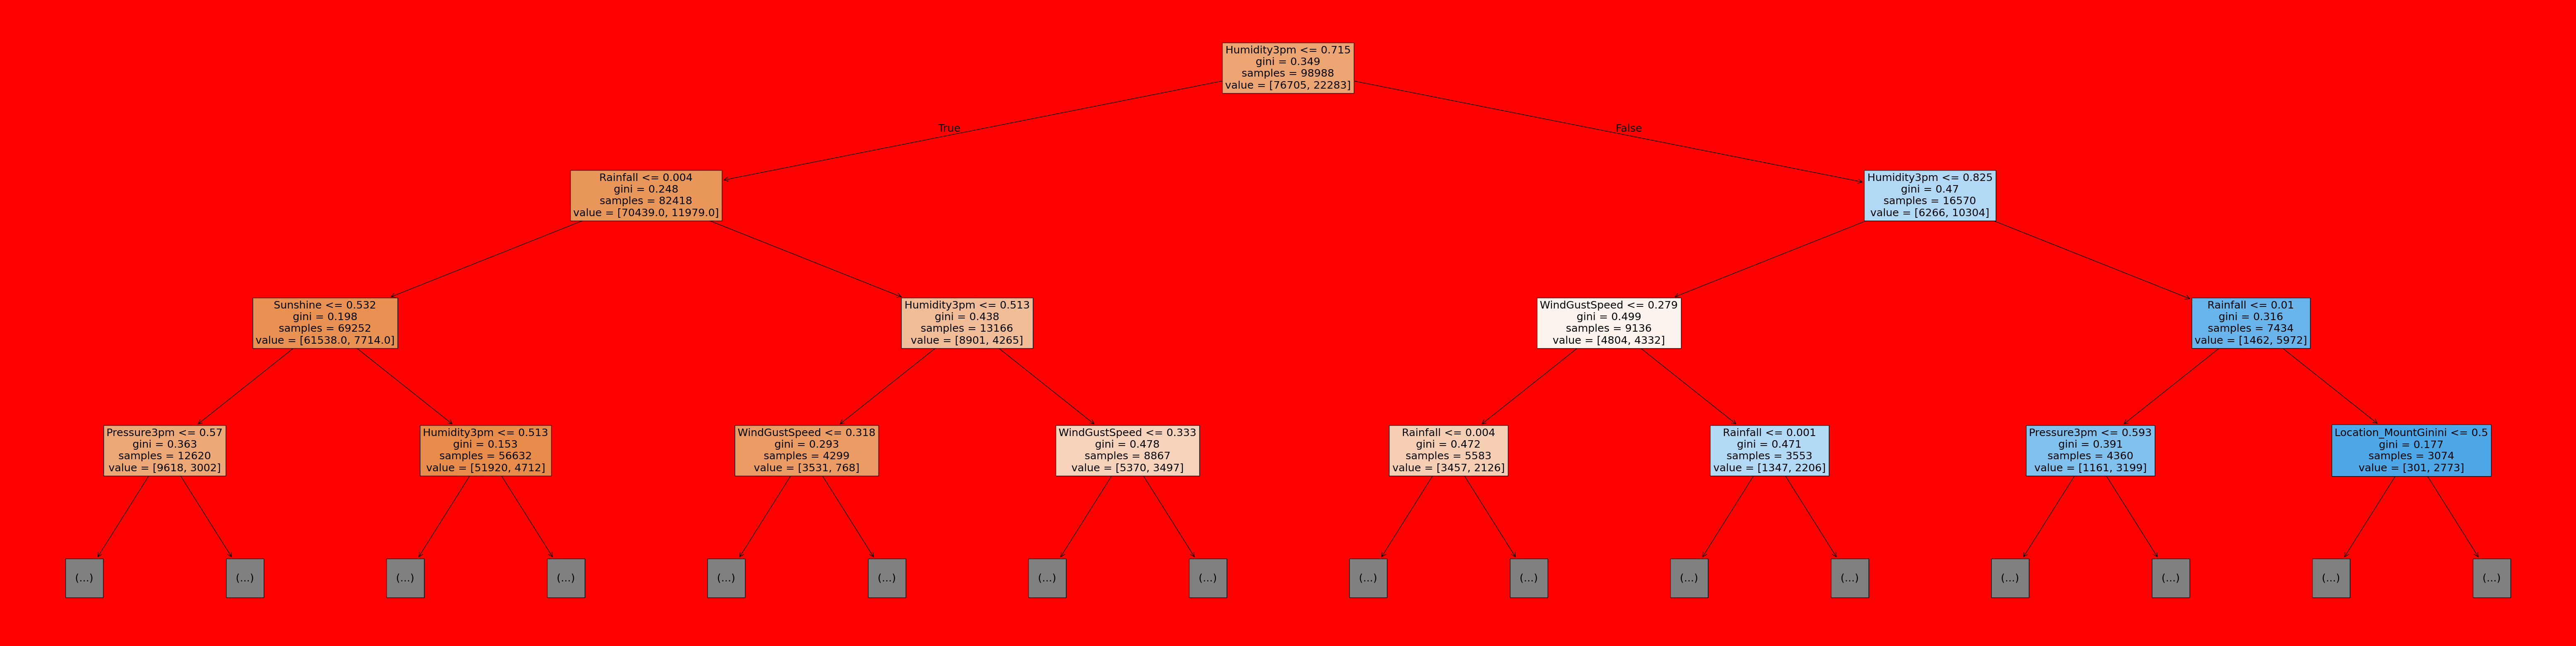

In [29]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True)

In [30]:
model.tree_.max_depth

48

In [31]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [32]:
model.feature_importances_

array([3.62010628e-02, 3.15410676e-02, 5.82546581e-02, 2.48322505e-02,
       5.08451879e-02, 5.48721143e-02, 2.68802557e-02, 3.04280561e-02,
       4.03337790e-02, 2.61055351e-01, 3.48742762e-02, 6.12186954e-02,
       1.31134817e-02, 1.92748524e-02, 3.34112355e-02, 2.99278458e-02,
       2.30948611e-03, 2.00269251e-03, 1.22618570e-03, 8.11664184e-04,
       1.56183476e-03, 1.09521007e-03, 6.53443035e-04, 1.63792732e-03,
       1.20114791e-03, 1.29168232e-03, 7.95286728e-04, 2.19922929e-03,
       1.74184984e-03, 2.68124067e-04, 1.18093830e-03, 1.59786025e-03,
       5.30953230e-04, 9.03108598e-04, 1.50171649e-03, 1.07133054e-03,
       8.07088742e-04, 8.03223575e-04, 1.79364244e-03, 2.09913294e-03,
       3.41903091e-04, 6.05150911e-04, 1.38447165e-03, 1.77902307e-03,
       1.35089758e-03, 8.51982460e-04, 6.83232777e-04, 1.56566910e-03,
       9.99683866e-04, 2.15218515e-03, 8.86321975e-04, 1.53907978e-03,
       8.71630249e-04, 1.28577975e-03, 1.60066700e-03, 5.28075720e-04,
      

In [33]:
importance_df=pd.DataFrame(
    {
        'feature':X_train.columns,
        'importance':model.feature_importances_
    }
).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261055
11,Pressure3pm,0.061219
2,Rainfall,0.058255
5,WindGustSpeed,0.054872
4,Sunshine,0.050845
8,Humidity9am,0.040334
0,MinTemp,0.036201
10,Pressure9am,0.034874
14,Temp9am,0.033411
1,MaxTemp,0.031541


In [34]:
model=DecisionTreeClassifier(random_state=42,max_depth=3)
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
model.score(X_train,train_targets)

0.8291308037337859

In [36]:
model.score(X_val,val_targets)

0.8334397307178921

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.532\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

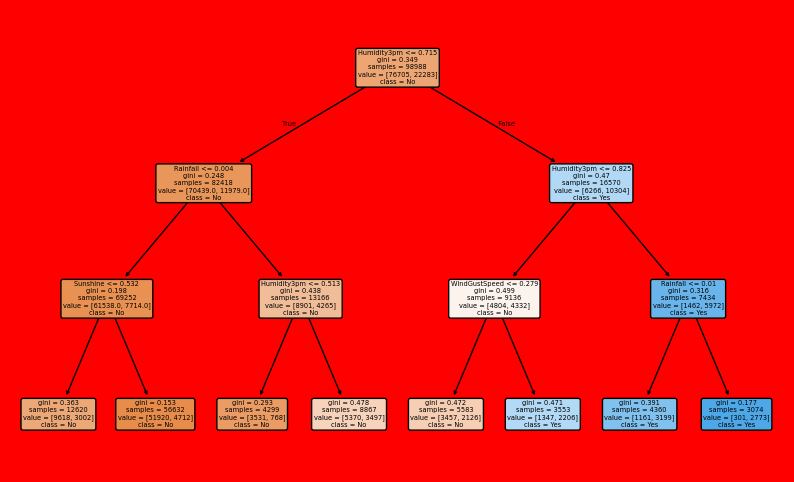

In [37]:
plot_tree(model,feature_names=X_train.columns,filled=True,rounded=True,class_names=model.classes_)

In [38]:
def max_depth_err(md):
  model=DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_error=1-model.score(X_train,train_targets)
  val_error=1-model.score(X_val,val_targets)
  return {"Max_depth":md,"Train_error":train_error,"Val_error":val_error}

In [39]:
errors_df=pd.DataFrame([max_depth_err(md) for md in range(1,30)])
errors_df

,Max_depth,Train_error,Val_error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157913
8,9,0.140977,0.156288
9,10,0.132945,0.157681


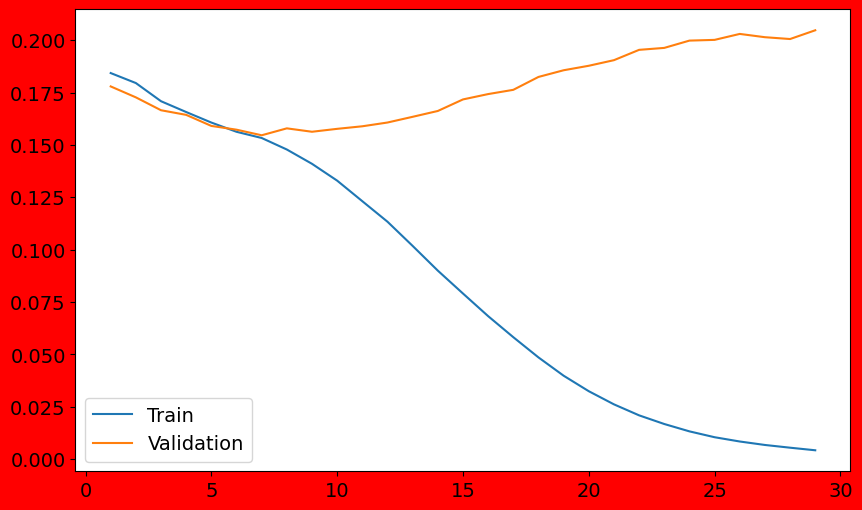

In [40]:
plt.plot(errors_df.Max_depth,errors_df.Train_error,label='Train')
plt.plot(errors_df.Max_depth,errors_df.Val_error,label='Validation')
plt.legend()

In [41]:
model=DecisionTreeClassifier(max_depth=7,random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [42]:
model.score(X_val,val_targets)

0.8453949277465034

In [43]:
model.score(X_train,train_targets)

0.8466884874934335

In [44]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [45]:
model.score(X_train,train_targets)


0.8480421869317493

In [46]:
model.score(X_val,val_targets)

0.8442342290058615

In [47]:
model.tree_.max_depth

12

In [48]:
def leaf_nodes_max_depth_err(ln,md):
  model=DecisionTreeClassifier(max_leaf_nodes=ln,max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_err=1-model.score(X_train,train_targets)
  val_err=1-model.score(X_val,val_targets)
  return {"Max_leaf_nodes":ln,"Max_depth":md,"Train_error":train_err,"Val_error":val_err}

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
model.score(X_train,train_targets)

0.9999595910615429

In [52]:
model.score(X_val,val_targets)

0.8560733561604086

In [53]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.95, 0.05],
       [0.97, 0.03],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [54]:
len(model.estimators_)

100

In [55]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.409\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570.0, 2734.0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindGustDir_ENE <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'MaxTemp <= 0.438\ngini = 0.282\nsamples = 48340\nvalue = [63506, 13002]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.553\ngini = 0.21\nsamples = 2979\nvalue = [4109, 557]'),
 Text(0.8125, 0.125, '\n

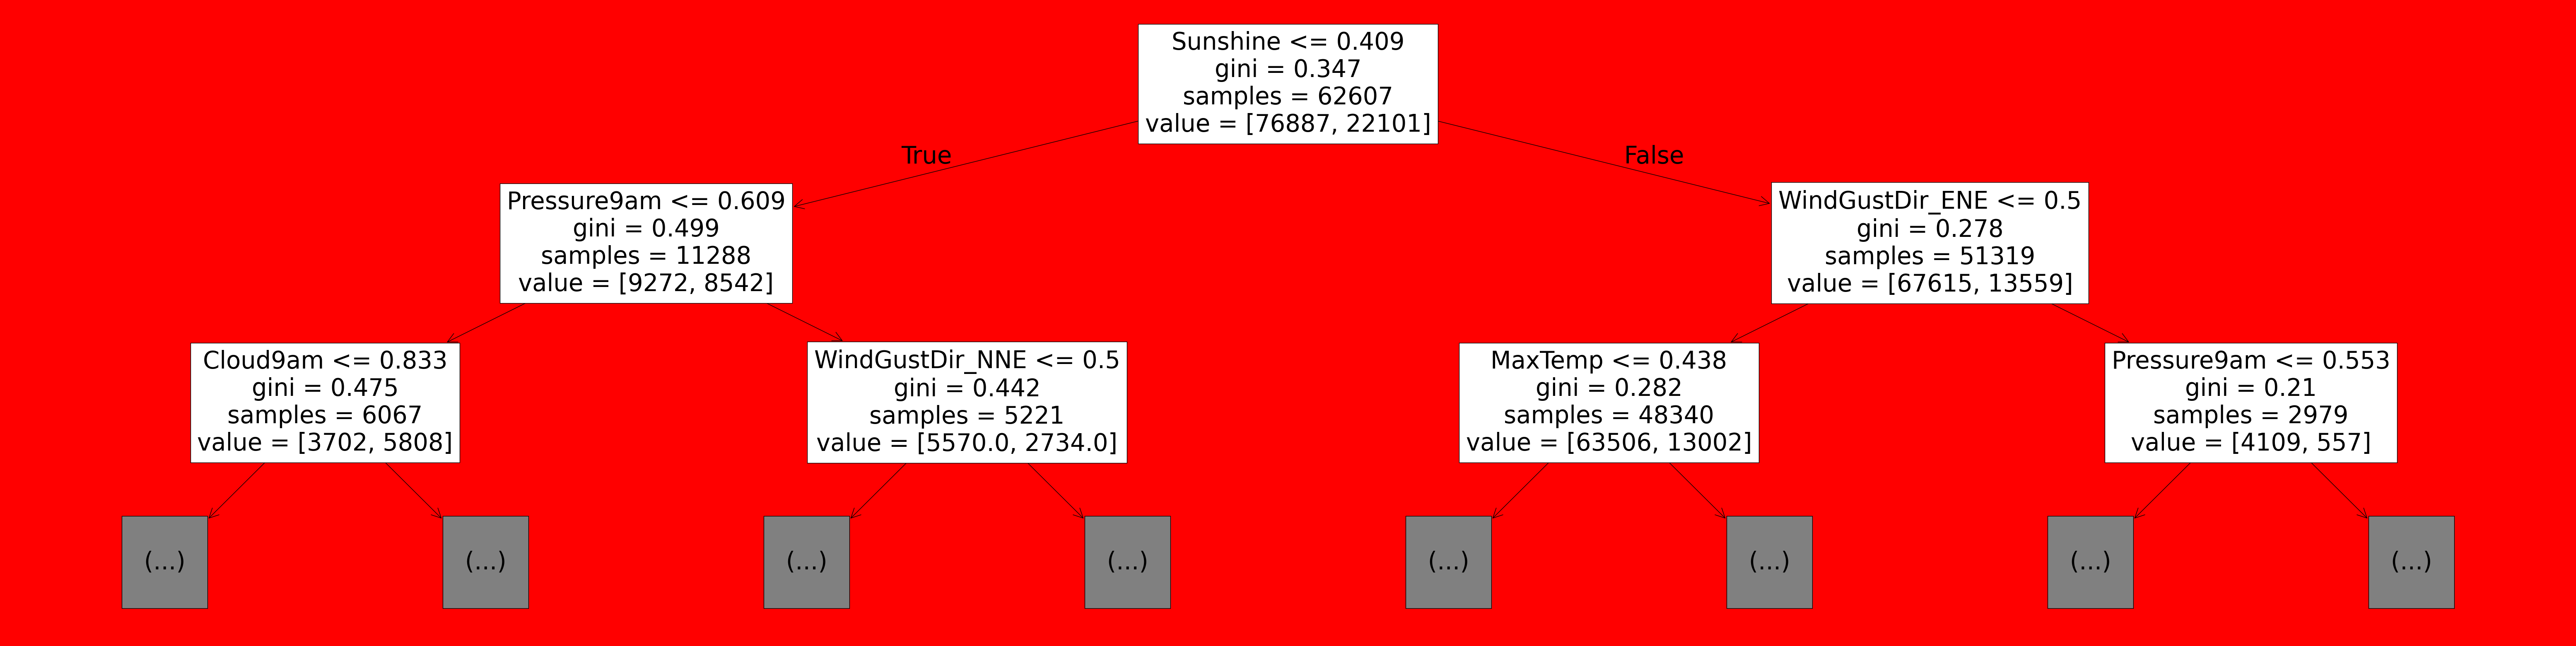

In [56]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.352\nsamples = 62686\nvalue = [76437, 22551]'),
 Text(0.25, 0.625, 'Cloud3pm <= 0.722\ngini = 0.266\nsamples = 48761\nvalue = [64702, 12133]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'WindSpeed3pm <= 0.31\ngini = 0.206\nsamples = 40175\nvalue = [55930, 7375]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Pressure3pm <= 0.611\ngini = 0.456\nsamples = 8586\nvalue = [8772, 4758]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Location_Witchcliffe <= 0.5\ngini = 0.498\nsamples = 13925\nvalue = [11735, 10418]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindSpeed9am <= 0.287\ngini = 0.498\nsamples = 13530\nvalue = [11467.0, 10032.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindDir3pm_SSE <= 0.5\ngini = 0.484\nsamples = 395\nvalue = [268.0, 386.0]'),
 Text

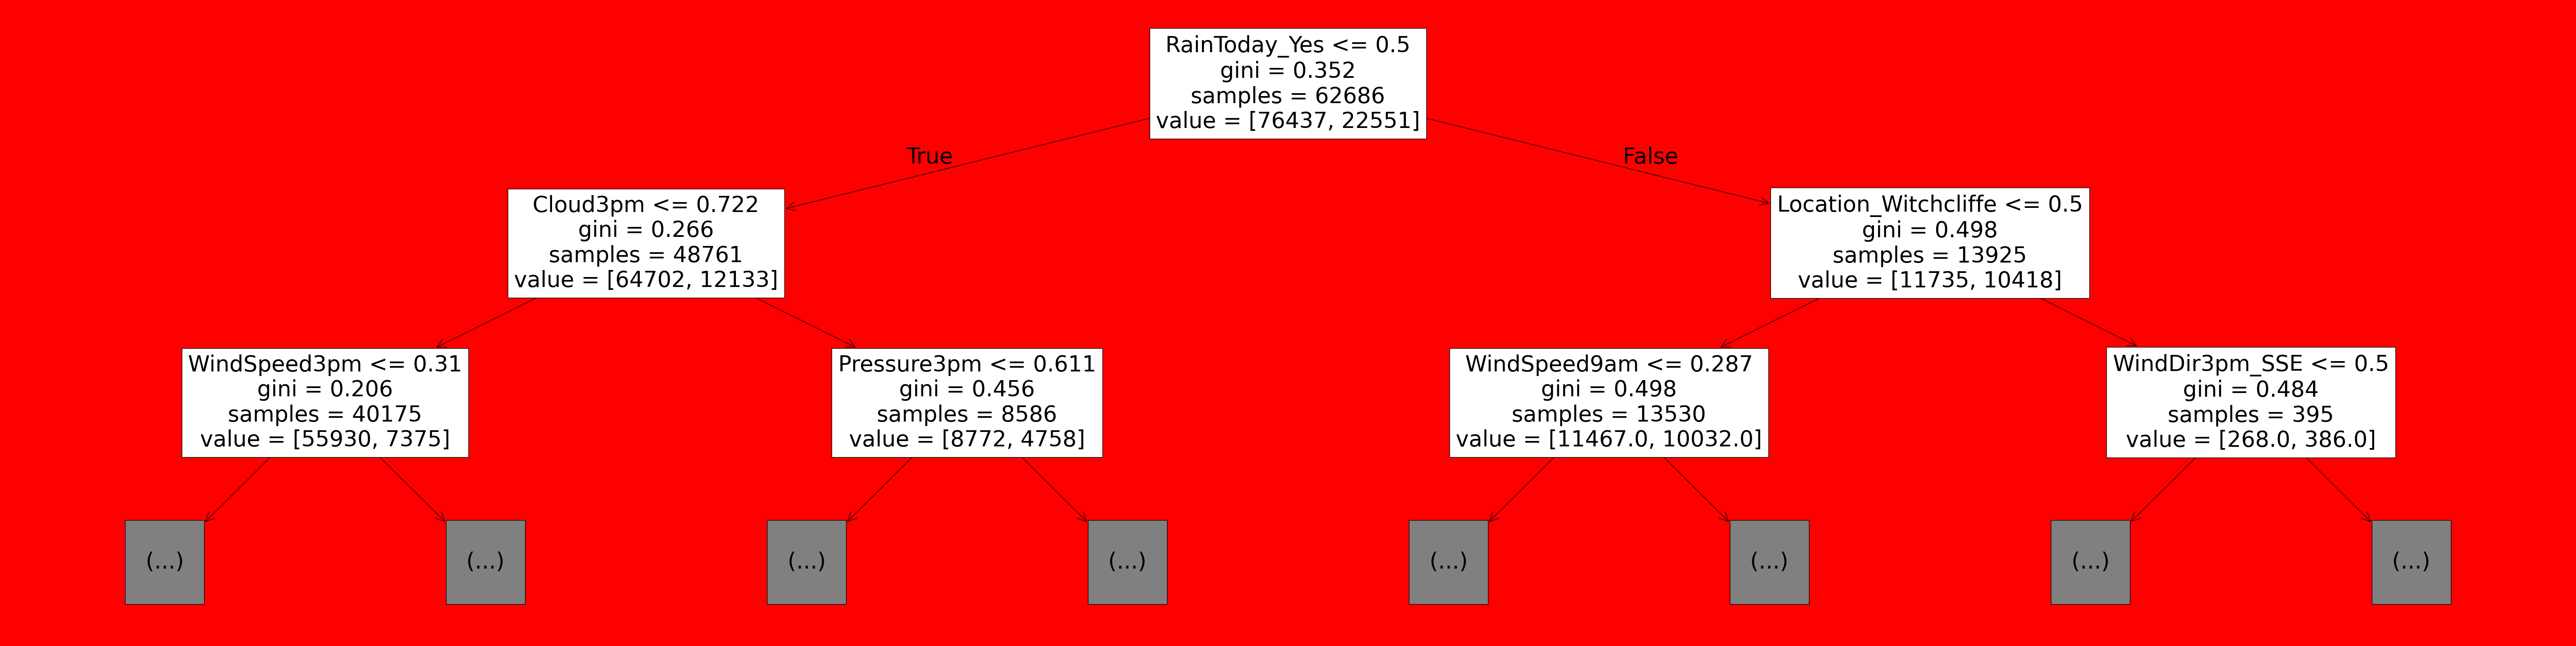

In [57]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[30],max_depth=2,feature_names=X_train.columns)

In [58]:
impoertance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)


,feature,importance
9,Humidity3pm,0.261055
11,Pressure3pm,0.061219
2,Rainfall,0.058255
5,WindGustSpeed,0.054872
4,Sunshine,0.050845
8,Humidity9am,0.040334
0,MinTemp,0.036201
10,Pressure9am,0.034874
14,Temp9am,0.033411
1,MaxTemp,0.031541


In [59]:
px.bar(impoertance_df.head(10),x='feature',y='importance')

In [60]:
base_model=RandomForestClassifier(n_jobs=-1,random_state=42)
base_model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [61]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [62]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8560733561604086)

In [63]:
model=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [64]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8571179850269862)

In [65]:
base_accs

(0.9999595910615429, 0.8560733561604086)

In [66]:
def test_params(**params):
  model=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
  model.fit(X_train,train_targets)
  return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [67]:
test_params(max_depth=5)

(0.8197559300117186, 0.8239800359816609)

In [72]:
test_params(max_depth=26)

(0.9814927061866084, 0.8563054959085369)

In [69]:
test_params(max_leaf_nodes=32)

(0.8313937042873883, 0.8335558005919563)

In [ ]:
test_params(max_leaf_nodes=2**20)

In [73]:
base_accs

(0.9999595910615429, 0.8560733561604086)

In [75]:
test_params(max_features='log2')

(0.9999494888269285, 0.8558992513493123)

In [76]:
test_params(max_features=20)

(0.9999494888269285, 0.8572340549010504)

In [77]:
test_params(min_impurity_decrease=1e-6)

(0.9889077463935022, 0.8564215657826011)

In [78]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [79]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999494888269285, 0.8531716093088039)

In [83]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features=7,
                               max_depth=30,
                               class_weight={'No': 1, 'Yes': 1.5})
model.fit(X_train, train_targets)


RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [84]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920596435931628, 0.8564215657826011)

In [85]:
base_accs


(0.9999595910615429, 0.8560733561604086)

In [86]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob